## Look at Bathymetry 6 ## 
and decide on river input points, and annotate the River with local landmarks

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import bathy_tools
from salishsea_tools import nc_tools
from salishsea_tools import rivertools

In [2]:
bathy = nc.Dataset('../../nemo-forcing/grid/bathy_meter_SalishSea6.nc', 'r')
print bathy.file_format

NETCDF4


/Users/sallen/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/Users/sallen/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


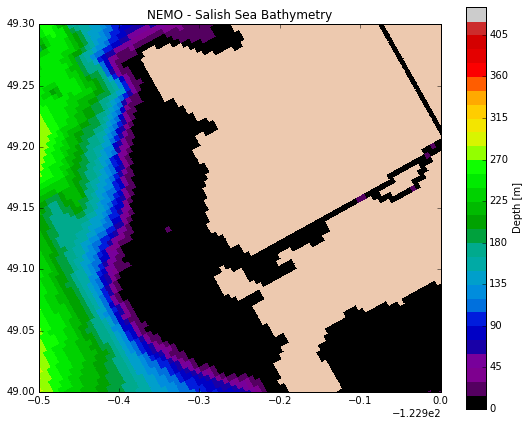

In [3]:
fig = bathy_tools.plot_colourmesh(
    bathy, 'NEMO - Salish Sea Bathymetry', 
    axis_limits=(-123.4, -122.9, 49., 49.3), colour_map='spectral', bins=30)

In [56]:
prop_dict = rivertools.get_watershed_prop_dict('fraser')

(47.132472991943359, -123.5491943359375)
(47.291996002197266, -123.13252258300781)
(47.409732818603516, -123.22938537597656)
63.8888888889


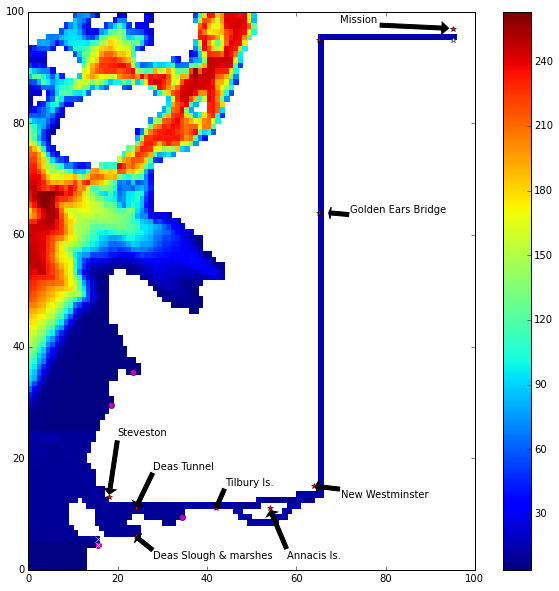

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
istart = 405; iend=505; jstart = 300; jend = 400
depth = bathy.variables['Bathymetry'][:]
lat = bathy.variables['nav_lat'][:]
lon = bathy.variables['nav_lon'][:]
mesh = ax.pcolormesh(depth[istart:iend, jstart:jend])
fig.colorbar(mesh, ax=ax)
for point in ('Fraser1', 'Fraser2', 'Fraser3', 'Fraser4'):
    ax.plot(prop_dict[point]['j']-jstart+0.5, prop_dict[point]['i']-istart+0.5,'om')
ax.plot((315-jstart+0.5, 315-jstart+0.5), (409-istart+0.5, 410-istart+0.5),'xw')

ax.plot(18, 13,'*r')
ax.annotate('Steveston', xy=(18, 13), xytext=(20, 24),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.plot(24, 11,'*r')
ax.annotate('Deas Tunnel', xy=(24, 11), xytext=(28, 18),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.plot(24, 6,'*r')
ax.annotate('Deas Slough & marshes', xy=(24, 6), xytext=(28, 2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.plot(54, 11,'*r')
ax.annotate('Annacis Is.', xy=(54, 11), xytext=(58, 2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.plot(42, 11,'*r')
ax.annotate('Tilbury Is.', xy=(42, 11), xytext=(44, 15),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.plot(64, 15,'*r')
ax.annotate('New Westminster', xy=(64, 15), xytext=(70, 13),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
print (lat[65, 15], lon[65, 15])
ax.plot(65, 95,'*r')
print (lat[65, 95], lon[65, 95])  # that's 36.13 km north of New West
ax.plot(95, 95, '*w')
print (lat[95, 95], lon[95, 95])  # that's 15 km east of the bend
ax.plot(95, 97,'*r')
ax.annotate('Mission', xy=(95, 97), xytext=(70, 98),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
print 15+80/36.*22
ax.plot(65, 64, '*r')
ax.annotate('Golden Ears Bridge', xy=(67, 64), xytext=(72, 64),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
# New West at 30 km Port Hammond (52 km), Mission 80 km

In [9]:
filepath = {}
filepath['short'] = 'stuff'
filepath['long'] = 'more stuff'
print filepath

{'short': 'stuff', 'long': 'more stuff'}


## And Now Consider the River Forcing Files

In [59]:
rivers = nc.Dataset('../../nemo-forcing/rivers/rivers_month.nc', 'r')

In [60]:
print (rivers.variables.keys())

[u'nav_lat', u'nav_lon', u'time_counter', u'rorunoff', u'rodepth', u'rotemper']


<matplotlib.colorbar.Colorbar instance at 0x115870638>

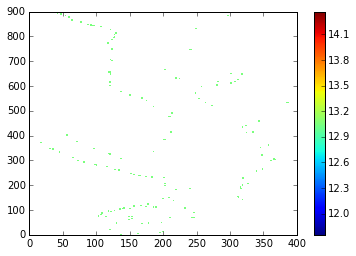

In [65]:
rotemper = rivers.variables['rotemper'][:]
plt.pcolormesh(rotemper[5])
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x1196b88c0>

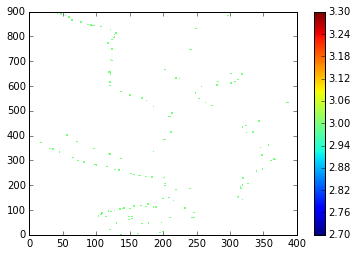

In [67]:
rotemper = rivers.variables['rodepth'][:]
plt.pcolormesh(rotemper)
plt.colorbar()